<img src="https://cdn.siberian.dev/siberian.png" alt="Siberian Logo">

### Linear Regression with Normalization & Power Transformer

This Code template is for the regression analysis using a simple Linear Regression where separate rescaling is done using Normalize and feature transformation is done using PowerTransformer in a pipeline. It is a linear approach to modeling the relationship between a scalar response and one or more explanatory variables.

### Required Packages

In [12]:
import warnings
import numpy as np 
import pandas as pd 
import seaborn as se 
import matplotlib.pyplot as plt 
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder, Normalizer, PowerTransformer
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error 
from sklearn.linear_model import LinearRegression
warnings.filterwarnings('ignore')

### Initialization

Filepath of CSV file

In [2]:
#filepath
file_path= ""

List of features which are  required for model training .

In [3]:
#x_values
features=[]

Target feature for prediction.

In [4]:
#y_value
target=''

### Data Fetching

Pandas is an open-source, BSD-licensed library providing high-performance, easy-to-use data manipulation and data analysis tools.

We will use panda's library to read the CSV file using its storage path.And we use the head function to display the initial row or entry.

In [5]:
df=pd.read_csv(file_path)
df.head()

,low,age,lwt,race,smoke,ptl,ht,ui,ftv,bwt
0,0,19,182,2,0,0,0,1,0,2523
1,0,33,155,3,0,0,0,0,3,2551
2,0,20,105,1,1,0,0,0,1,2557
3,0,21,108,1,1,0,0,1,2,2594
4,0,18,107,1,1,0,0,1,0,2600


### Feature Selections

It is the process of reducing the number of input variables when developing a predictive model. Used to reduce the number of input variables to both reduce the computational cost of modelling and, in some cases, to improve the performance of the model.

We will assign all the required input features to X and target/outcome to Y.

In [6]:
X=df[features]
Y=df[target]

### Data Preprocessing

Since the majority of the machine learning models in the Sklearn library doesn't handle string category data and Null value, we have to explicitly remove or replace null values. The below snippet have functions, which removes the null value if any exists. And convert the string classes data in the datasets by encoding them to integer classes.


In [7]:
def NullClearner(df):
    if(isinstance(df, pd.Series) and (df.dtype in ["float64","int64"])):
        df.fillna(df.mean(),inplace=True)
        return df
    elif(isinstance(df, pd.Series)):
        df.fillna(df.mode()[0],inplace=True)
        return df
    else:return df
def EncodeX(df):
    return pd.get_dummies(df)

Calling preprocessing functions on the feature and target set.


In [8]:
x=X.columns.to_list()
for i in x:
    X[i]=NullClearner(X[i])
X=EncodeX(X)
Y=NullClearner(Y)
X.head()

,low,age,lwt,race,smoke,ftv
0,0,19,182,2,0,0
1,0,33,155,3,0,3
2,0,20,105,1,1,1
3,0,21,108,1,1,2
4,0,18,107,1,1,0


#### Correlation Map

In order to check the correlation between the features, we will plot a correlation matrix. It is effective in summarizing a large amount of data where the goal is to see patterns.

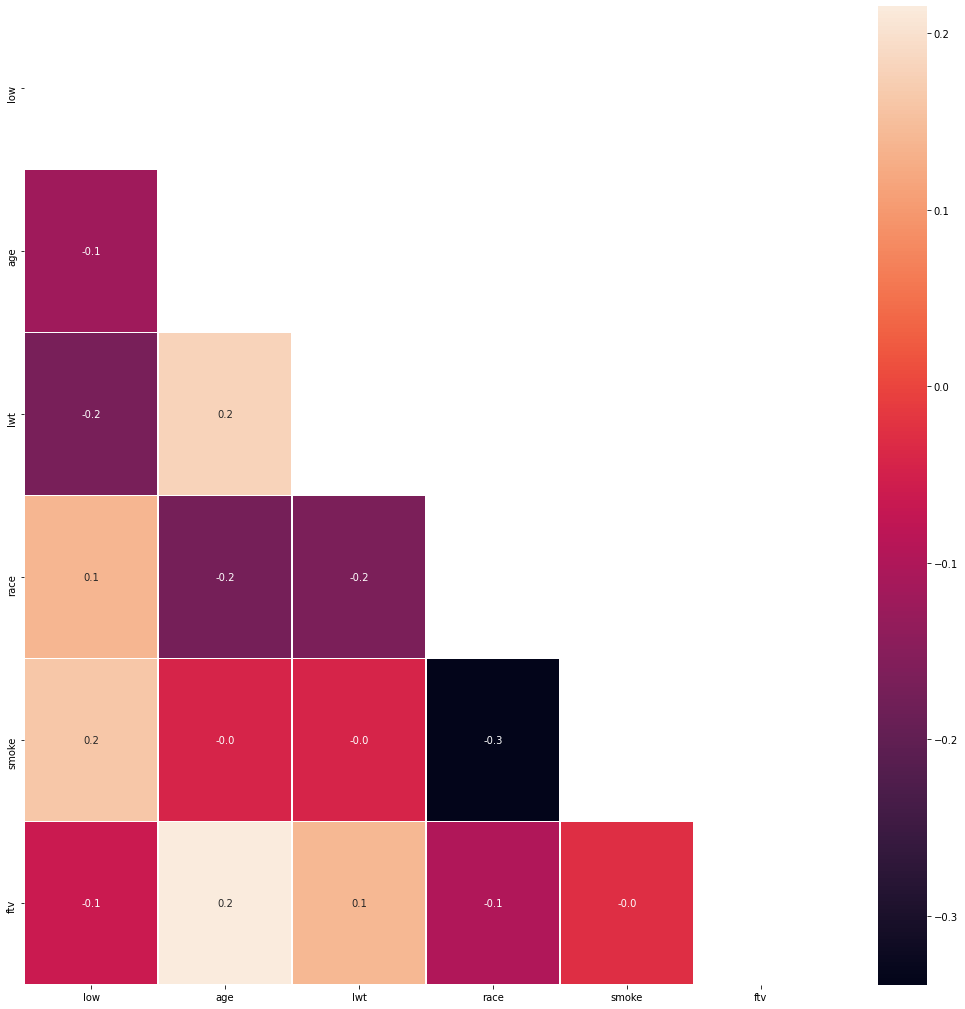

In [9]:
f,ax = plt.subplots(figsize=(18, 18))
matrix = np.triu(X.corr())
se.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax, mask=matrix)
plt.show()

### Data Splitting

The train-test split is a procedure for evaluating the performance of an algorithm. The procedure involves taking a dataset and dividing it into two subsets. The first subset is utilized to fit/train the model. The second subset is used for prediction. The main motive is to estimate the performance of the model on new data.

In [10]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=123)

### Data Rescaling

Normalize samples individually to unit norm.

Each sample (i.e. each row of the data matrix) with at least one non zero component is rescaled independently of other samples so that its norm (l1, l2 or inf) equals one.

[More on Normalizer module and parameters](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Normalizer.html)

In [11]:
normalize = Normalizer()
x_train = normalize.fit_transform(x_train)
x_test = normalize.transform(x_test)

### Feature Transformation

Power transforms are a family of parametric, monotonic transformations that are applied to make data more Gaussian-like. This is useful for modeling issues related to heteroscedasticity (non-constant variance), or other situations where normality is desired.

[More on PowerTransformer module and parameters](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PowerTransformer.html)

### Model

Linear regression algorithm attempts to model the relationship between two variables by fitting a linear equation to observed data. One variable is considered to be an independent variable, and the other is considered to be a dependent variable. 

LinearRegression fits a linear model with coefficients w = (w1, …, wp) to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation.

In [13]:
model = make_pipeline(PowerTransformer(),LinearRegression())
model.fit(x_train,y_train)

Pipeline(steps=[('powertransformer', PowerTransformer()),
                ('linearregression', LinearRegression())])

#### Model Accuracy

We will use the trained model to make a prediction on the test set.Then use the predicted value for measuring the accuracy of our model.

score: The score function returns the coefficient of determination R2 of the prediction.


In [14]:
print("Accuracy score {:.2f} %\n".format(model.score(x_test,y_test)*100))

Accuracy score 72.31 %



> **r2_score**: The **r2_score** function computes the percentage variablility explained by our model, either the fraction or the count of correct predictions.  

> **mae**: The **mean abosolute error** function calculates the amount of total error(absolute average distance between the real data and the predicted data) by our model.  

> **mse**: The **mean squared error** function squares the error(penalizes the model for large errors) by our model. 

In [15]:
y_pred=model.predict(x_test)
print("R2 Score: {:.2f} %".format(r2_score(y_test,y_pred)*100))
print("Mean Absolute Error {:.2f}".format(mean_absolute_error(y_test,y_pred)))
print("Mean Squared Error {:.2f}".format(mean_squared_error(y_test,y_pred)))

R2 Score: 72.31 %
Mean Absolute Error 306.32
Mean Squared Error 127179.72


#### Prediction Plot

First, we make use of a plot to plot the actual observations, with x_train on the x-axis and y_train on the y-axis.
For the regression line, we will use x_train on the x-axis and then the predictions of the x_train observations on the y-axis.

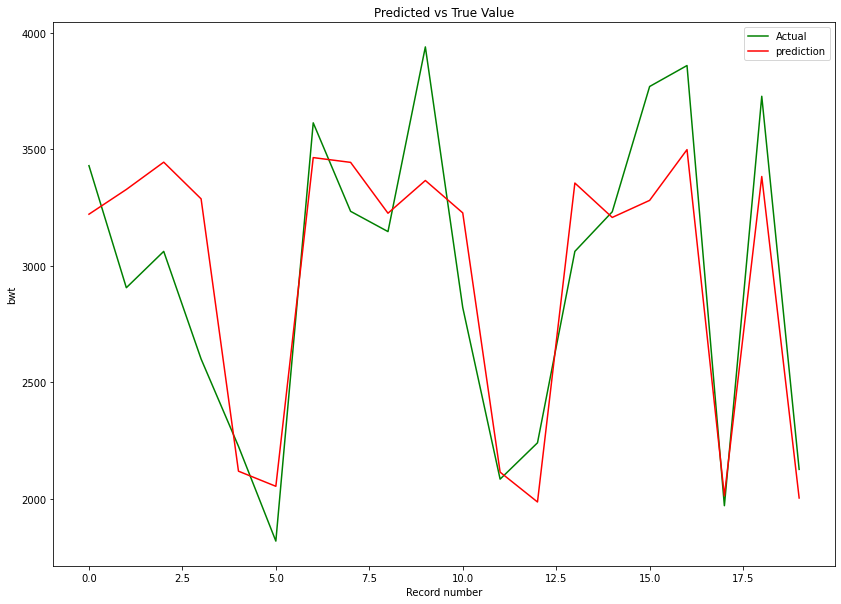

In [16]:
plt.figure(figsize=(14,10))
plt.plot(range(20),y_test[0:20], color = "green")
plt.plot(range(20),model.predict(x_test[0:20]), color = "red")
plt.legend(["Actual","prediction"]) 
plt.title("Predicted vs True Value")
plt.xlabel("Record number")
plt.ylabel(target)
plt.show()

#### Creator: Nikhil Shrotri , Github: [Profile](https://github.com/nikhilshrotri)
